In [26]:
import numpy as np
import matplotlib.pyplot as plt

In [27]:
xx = np.array([1, 2, 3, 4])
yy = np.array([0, 5, 1, 2])

In [28]:
yy [ xx < 3]

array([0, 5])

In [29]:
yy [ ~(xx < 3)]

array([1, 2])

In [30]:
def mse(x):
    """ ((y - ypred)**2) / len(y)"""
    return ((x - x.mean())**2).mean()

def split(X, y, i):
    """y'yi X'in i degerine gore bol."""
    f = X < i # [True, False, True , True, True]
    return y[f], y[~f]

def best_split(X, y):
    z = []
    
    sorted_set = sorted(set(X))
    
    for i in range(1,len(sorted_set)):
        
        left, right = split(X, y, sorted_set[i])

        error = (
                 + mse(left)*left.shape[0]
                 + mse(right)*right.shape[0]
                 ) / X.shape[0]
        
        z.append( (error, i) )

    # return min(z)
    bestie = min(z)[1]
    return (sorted_set[bestie - 1] + sorted_set[bestie]) / 2


def get_sections(X, y):
    splitter = best_split(X, y)
    X_left, X_right = split(X, X, splitter)
    y_left, y_right = split(X, y, splitter)
    return (X_left, y_left), (X_right, y_right)


In [31]:
a = [(0, 4), (0.22, 5)]

In [32]:
min(a)[1]

4

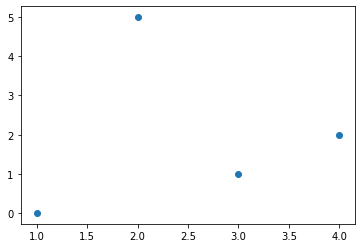

In [38]:
plt.scatter(xx, yy)

In [39]:
best_split(xx, yy)

1.5

### Ornek 1

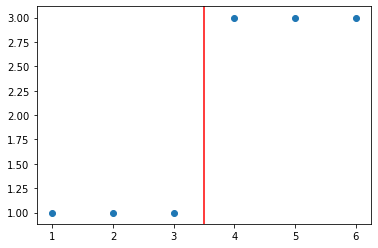

In [40]:
X = np.array([1,2,3,4,5,6])
y = np.array([1,1,1,3,3,3])

plt.scatter(X, y)
plt.axvline(best_split(X, y), color='red')

In [47]:
best_split(X, y)

3.5

In [41]:
get_sections(X, y)

((array([1, 2, 3]), array([1, 1, 1])), (array([4, 5, 6]), array([3, 3, 3])))

In [45]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

In [46]:
model = DecisionTreeRegressor(max_depth=1)
model.fit(X.reshape(-1,1), y)
print(export_text(model))

|--- feature_0 <= 3.50
|   |--- value: [1.00]
|--- feature_0 >  3.50
|   |--- value: [3.00]



### Ornek 2

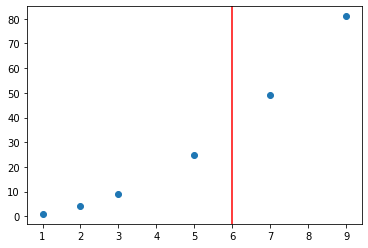

In [51]:
X = np.array([3,5,9,1,2,7])
y = np.array([9,25,81,1,4,49])
plt.scatter(X, y)
plt.axvline(best_split(X, y), color='red')

In [49]:
l,r = get_sections(X, y)
ll, lr = get_sections(l[0], l[1])

In [50]:
r

(array([9, 7]), array([81, 49]))

In [93]:
l

(array([3, 5, 1, 2]), array([ 9, 25,  1,  4]))

In [96]:
best_split(*l)

4.0

In [92]:
ll

(array([3, 1, 2]), array([9, 1, 4]))

### Ornek 3

X ayni fakat y degisik.

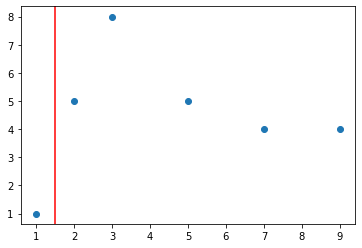

In [52]:
X = np.array([3,5,9,1,2,7])
y = np.array([8,5,4,1,5,4])
plt.scatter(X, y)
plt.axvline(best_split(X, y), color='red')

#### Muteakip dilimlemeler

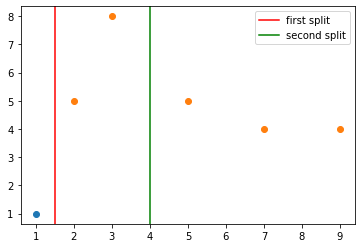

In [58]:
plt.axvline(best_split(X, y), color='red', label='first split')
left, right = get_sections(X, y)
plt.scatter(*left)
plt.scatter(*right)
plt.axvline(best_split(*right), color='green', label='second split')
plt.legend()

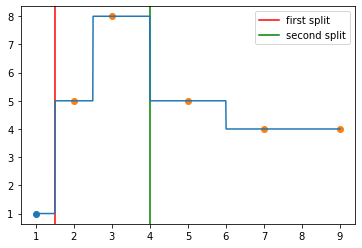

In [59]:
plt.axvline(best_split(X, y), color='red', label='first split')
left, right = get_sections(X, y)
plt.scatter(*left)
plt.scatter(*right)
plt.axvline(best_split(*right), color='green', label='second split')
plt.legend()

model = DecisionTreeRegressor()
model.fit(X.reshape(-1,1), y)
xrange = np.linspace(X.min(), X.max(), 1000)
y_pred = model.predict(xrange.reshape(-1, 1))
plt.plot(xrange, y_pred)

In [60]:
print(export_text(model))

|--- feature_0 <= 1.50
|   |--- value: [1.00]
|--- feature_0 >  1.50
|   |--- feature_0 <= 4.00
|   |   |--- feature_0 <= 2.50
|   |   |   |--- value: [5.00]
|   |   |--- feature_0 >  2.50
|   |   |   |--- value: [8.00]
|   |--- feature_0 >  4.00
|   |   |--- feature_0 <= 6.00
|   |   |   |--- value: [5.00]
|   |   |--- feature_0 >  6.00
|   |   |   |--- value: [4.00]



In [88]:
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor, export_text

In [89]:
X, y = make_regression(n_samples=20, n_features=2, n_informative=2, random_state=42)

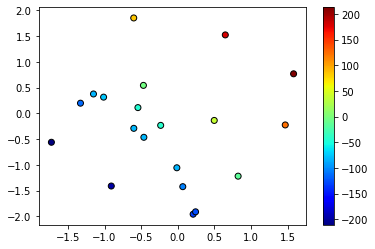

In [90]:
plt.scatter(X.T[0], X.T[1], c=y, cmap='jet',edgecolors='black', linewidths=1)
plt.colorbar()

In [91]:
tree = DecisionTreeRegressor(max_depth=1)
tree = tree.fit(X, y)

In [92]:
x11, x22 = np.meshgrid(
    np.linspace(X.T[0].min(), X.T[0].max(), 1000),
    np.linspace(X.T[1].min(), X.T[1].max(), 1000)
)

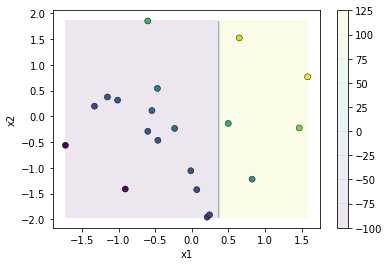

In [93]:
plt.scatter(X.T[0], X.T[1], c=y, edgecolors='black', linewidths=0.5)
plt.xlabel('x1')
plt.ylabel('x2')
plt.contourf(x11,
             x22,
             tree.predict(
                 np.array(
                     [x11.ravel(),
                     x22.ravel()]
                         ).T).reshape(x11.shape), alpha=0.1)
plt.colorbar()

In [94]:
print(export_text(tree))

|--- feature_0 <= 0.37
|   |--- value: [-85.80]
|--- feature_0 >  0.37
|   |--- value: [108.13]



In [103]:
best_split(X[:,1], y)

0.6549973863694367

In [104]:
left, right = get_sections(X[:,1], y)

In [105]:
left[1].mean()

-72.063025141917

In [106]:
right[1].mean()

159.5646579395892

In [99]:
best_split(X[:,0], y)

0.3693382122886334

In [100]:
left, right = get_sections(X[:,0], y)

In [101]:
left[1].mean()

-85.80044105277338

In [102]:
right[1].mean()

108.12583243955596

In [71]:
X, y = make_regression(n_samples=100, n_features=2, random_state=42)
# -0.228

In [72]:
best_split(X[:,0], y)

-0.6784733609422248

In [74]:
b = best_split(X[:,1], y)

In [75]:
left, right = get_sections(X[:,1], y)

In [76]:
left[1].mean()

-65.35263799901419

In [77]:
right[1].mean()

65.86010859478519

In [79]:
model = DecisionTreeRegressor(max_depth=1)
model.fit(X, y)
print(export_text(model))

|--- feature_1 <= 0.25
|   |--- value: [-65.35]
|--- feature_1 >  0.25
|   |--- value: [65.86]

